In [ ]:
!pip install fastbook
from fastbook import *


In [54]:
#search images using duck duck go scrapper
urls = search_images_ddg('black people photos', max_images=1)
print(len(urls), urls[0])

1 https://dm0qx8t0i9gc9.cloudfront.net/thumbnails/video/rZJIMvhmliwmde8a6/videoblocks-happy-black-african-man-in-suit-portrait-of-excited-cheerful-man-indoor-against-window-background_sh2ahadmq_thumbnail-1080_01.png


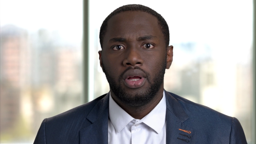

In [55]:
dest = Path('blackpeople.jpg')
if not dest.exists():
  download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

#images are made up of 2d matrix with 0-256 color

In [56]:
import os
from pathlib import Path

searches = 'White people', 'Black People'
path = Path('black_or_white')

if not path.exists():
  path.mkdir()

for o in searches:
  dest = (path / o)
  results = search_images_ddg(f'{o} photo')
  download_images(dest, urls=results[:200])
  resize_images(dest, max_size=400, dest=path/o)


In [57]:
# broken images break the NN so this is used to discard all broken images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#30) [None,None,None,None,None,None,None,None,None,None...]

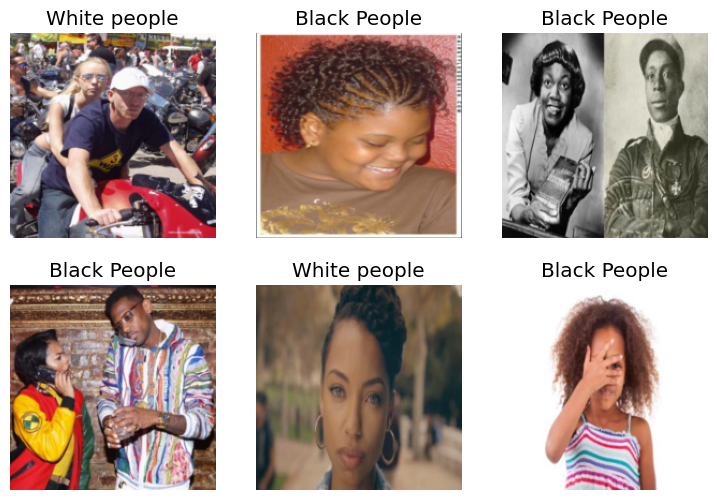

In [58]:
# Data block gives fast ai to give all parameters to create a data vision model dataset
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)
#data block gives batches of data to ai model
dls.show_batch(max_n=6)

In [59]:
learn = vision_learner(dls, resnet18, metrics=error_rate)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [60]:
# fine_tune() teach the model the differeces between your model and what it is built for
# adjusts the weights accordingly
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.422114,1.528080,0.565217,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.998179,1.064310,0.434783,01:05
1,0.703610,1.008849,0.391304,01:06
2,0.540449,0.983554,0.376812,01:04


In [62]:
is_black,_,probs = learn.predict(PILImage.create('blackpeople.jpg')) #predict whether it is a person is black or not
print(f'This is a: {is_black}. ')
print(f'Probability it is a black: {probs[0]:.4f}')


This is a: Black People. 
Probability it is a black: 0.9580


In [ ]:
# PaLM (Pathways Language Models)
# image based algo are not only for images. It can also be used to classify sounds
# take time series and create pictures from it
# mouse movements to make images and apply image classifiers

# Adam Optimizer in pytorch
